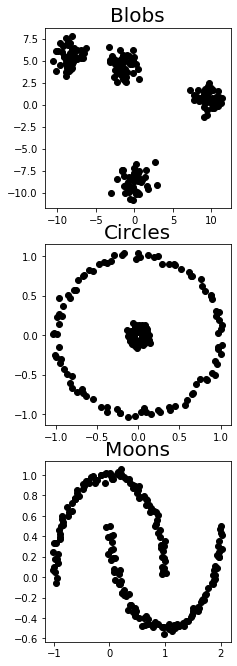

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons, make_s_curve, make_swiss_roll
import numpy as np
from random import random, seed
from scipy.spatial import distance

np.random.seed(7)
seed(1)

fig, axs1 = plt.subplots(3,1,figsize=(10/3,11.3))

blobs=make_blobs(200,2,4)
data_blobs=blobs[0]
axs1[0].plot(data_blobs[:,0],data_blobs[:,1],'ok');
axs1[0].set_title('Blobs', fontsize=20);

circles=make_circles(200,noise=0.03, factor=0.1)
data_circles=circles[0]
axs1[1].plot(data_circles[:,0],data_circles[:,1],'ok');
axs1[1].set_title('Circles', fontsize=20);

moons=make_moons(200,noise=0.03)
data_moons=moons[0]
axs1[2].plot(data_moons[:,0],data_moons[:,1],'ok');
axs1[2].set_title('Moons', fontsize=20);

# s_curve=make_s_curve(200,noise=0.03)
# data_s_curve=s_curve[0]
# axs1[0,3].plot(data_s_curve[:,0],data_s_curve[:,2],'ok');
# axs1[0,3].set_title('S-curve');

# swiss_roll=make_swiss_roll(200,noise=0.1)
# data_swiss_roll=swiss_roll[0]
# axs1[0,4].plot(data_swiss_roll[:,0],data_swiss_roll[:,2],'ok');
# axs1[0,4].set_title('Swiss-roll');





In [6]:
def GetGramMatrix(X, kernel, **kwargs):
    gamma = kwargs.get('gamma', None)
    r = kwargs.get('r', None)
    m = kwargs.get('m', None)
    sigma = kwargs.get('sigma', None)
    alpha = kwargs.get('alpha', None)
    beta = kwargs.get('beta', None)
    c = kwargs.get('c', None)
    
    n=np.size(X,1)
    K=np.zeros((n,n))
    
    if kernel=='linear':
        K=np.matmul(X,X.T)
    
    if kernel=='polynomial':
        K=(gamma*np.matmul(X,X.T)+r)**m
    
    if kernel=='rbf':
        K=np.exp(-distance.cdist(X,X,'euclidean')**2/(2*sigma**2))
    
    if kernel=='laplacian':
        K=np.exp(-alpha*distance.cdist(X,X,'cityblock')**2)
    
    if kernel=='sigmoid':
        K=np.tanh(beta*np.matmul(X,X.T)+c)
    return K

def GenerateZ(num_datapoints,num_clusters):
    Z=np.zeros((num_datapoints,num_clusters))
    Z[0:num_clusters,0:num_clusters]=np.eye(num_clusters)
    for i in range(num_clusters,num_datapoints):
        Z[i,int(np.round(random()*(num_clusters-1)))]=1
    return Z

def LoopZ(Z_new,gram,num_datapoints,num_clusters):
    ns = np.sum(Z_new, axis=0)
    Z=np.zeros((num_datapoints,num_clusters))
    T=np.zeros((num_datapoints,num_clusters))
    j=0
    while np.array_equal(Z,Z_new)==False:
        Z=np.copy(Z_new)
        for i in range(num_clusters):
            T[:, i] = -(2 / ns[i]) * np.sum(np.matmul(np.ones((num_datapoints, 1)), np.transpose(Z[:, i:(i + 1)])) * gram, 1)
            T[:, i] += 1. / (ns[i] ** 2) * \
                np.sum(np.matmul(Z[:, i:(i + 1)], np.transpose(Z[:, i:(i + 1)])) * gram) * np.ones((num_datapoints,))
        Z_new=np.zeros((num_datapoints,num_clusters))
        for i in range(num_datapoints):
            Z_new[i,np.argmin(T[i, :])]=1
        j+=1
        if j==10000:
            break
        if j % 20 == 0:
            Z_new=GenerateZ(num_datapoints,num_clusters)
        
    return Z


def GeneratePlot(kernel,data_set,subplot_row,subplot_col,**kwargs):
    np.random.seed(7)
    seed(1)
    gamma = kwargs.get('gamma', 1)
    r = kwargs.get('r', 1)
    m = kwargs.get('m', 1)
    sigma = kwargs.get('sigma', 1)
    alpha = kwargs.get('alpha', 1)
    beta = kwargs.get('beta', 1)
    c = kwargs.get('c', 1)
    num_datapoints = kwargs.get('num_datapoints', 100)
    num_clusters = kwargs.get('num_clusters', None)
    
    
    if data_set=='blobs':
        blobs=make_blobs(num_datapoints,2,num_clusters)
        X=blobs[0]
    if data_set=='circles':
        circles=make_circles(num_datapoints,noise=0.03, factor=0.1)
        X=circles[0]
        num_clusters=2
    if data_set=='moons':
        moons=make_moons(num_datapoints,noise=0.03)
        X=moons[0]
        num_clusters=2
    if data_set=='s_curve':
        s_curve=make_s_curve(num_datapoints,noise=0.03)
        X=s_curve[0]
        num_clusters=1
    if data_set=='swiss_roll':
        swiss_roll=make_swiss_roll(num_datapoints,noise=0.1)
        X=swiss_roll[0]
        num_clusters=1
    
    kwargs={'gamma':gamma,'r':r,'m':m,'sigma':sigma,'alpha':alpha,'beta':beta,'c':c}
    gram=GetGramMatrix(X,kernel,**kwargs)
    Z_new=GenerateZ(num_datapoints,num_clusters)
    Z=LoopZ(Z_new,gram,num_datapoints,num_clusters)
    classes=np.matmul(Z,np.linspace(1,num_clusters,num_clusters))
    axs1[subplot_row,subplot_col].scatter(X[:,0],X[:,1],c=classes);
    
    if kernel=='linear':
        axs1[subplot_row,subplot_col].set_title('kernel: ' + kernel, fontsize=20);
    
    if kernel=='polynomial':
        axs1[subplot_row,subplot_col].set_title(kernel +', gamma='+str(gamma) + ', r=' +str(r)+', m='+str(m), fontsize=15);
    
    if kernel=='rbf':
        axs1[subplot_row,subplot_col].set_title('kernel: ' + kernel +', sigma='+str(sigma), fontsize=15);

    if kernel=='laplacian':
        axs1[subplot_row,subplot_col].set_title('kernel: ' + kernel +', alpha='+str(alpha), fontsize=15);
    
    if kernel=='sigmoid':
        axs1[subplot_row,subplot_col].set_title('kernel: ' + kernel +', alpha='+str(beta) + ', c=' +str(c), fontsize=15);
    
def DrawPlotsWhileFindingZ(kernel,data_set,num_datapoints,num_clusters,**kwargs):
    np.random.seed(7)
    seed(1)
    
    gamma = kwargs.get('gamma', 1)
    r = kwargs.get('r', 1)
    m = kwargs.get('m', 1)
    sigma = kwargs.get('sigma', 1)
    alpha = kwargs.get('alpha', 1)
    beta = kwargs.get('beta', 1)
    c = kwargs.get('c', 1)
    
    if data_set=='blobs':
        blobs=make_blobs(num_datapoints,2,num_clusters)
        X=blobs[0]
    if data_set=='circles':
        circles=make_circles(num_datapoints,noise=0.03, factor=0.1)
        X=circles[0]
        num_clusters=2
    if data_set=='moons':
        moons=make_moons(num_datapoints,noise=0.03)
        X=moons[0]
        num_clusters=2
    if data_set=='s_curve':
        s_curve=make_s_curve(num_datapoints,noise=0.03)
        X=s_curve[0]
        num_clusters=1
    if data_set=='swiss_roll':
        swiss_roll=make_swiss_roll(num_datapoints,noise=0.1)
        X=swiss_roll[0]
        num_clusters=1
    
    Z_new=GenerateZ(num_datapoints,num_clusters)
    
    kwargs={'gamma':gamma,'r':r,'m':m,'sigma':sigma,'alpha':alpha,'beta':beta,'c':c}
    gram=GetGramMatrix(X,kernel,**kwargs)
                       
    ns = np.sum(Z_new, axis=0)
    Z=np.zeros((num_datapoints,num_clusters))
    T=np.zeros((num_datapoints,num_clusters))
    j=0
    while np.array_equal(Z,Z_new)==False:
        Z=np.copy(Z_new)
        for i in range(num_clusters):
            T[:, i] = -(2 / ns[i]) * np.sum(np.matmul(np.ones((num_datapoints, 1)), np.transpose(Z[:, i:(i + 1)])) * gram, 1)
            T[:, i] += 1. / (ns[i] ** 2) * \
                np.sum(np.matmul(Z[:, i:(i + 1)], np.transpose(Z[:, i:(i + 1)])) * gram) * np.ones((num_datapoints,))
        Z_new=np.zeros((num_datapoints,num_clusters))
        for i in range(num_datapoints):
            Z_new[i,np.argmin(T[i, :])]=1
        j+=1
        if j==10000:
            break
        if j % 10 == 0:
            Z_new=GenerateZ(num_datapoints,num_clusters)
        classes=np.matmul(Z,np.linspace(1,num_clusters,num_clusters))
        plt.scatter(X[:,0],X[:,1],c=classes);
        plt.pause(0.05)
    return Z
    

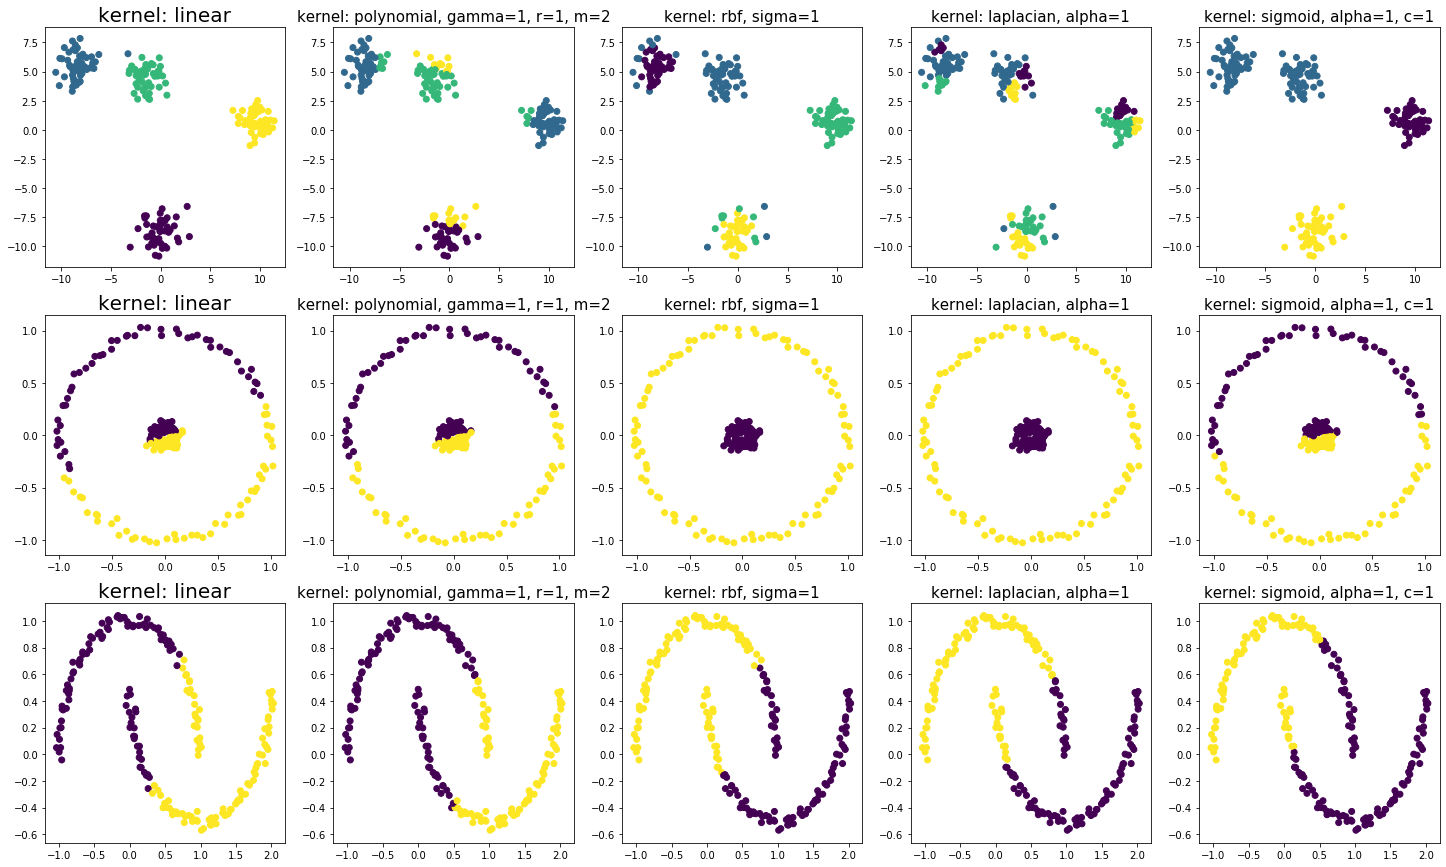

In [126]:
np.random.seed(6)
seed(1)

fig, axs1 = plt.subplots(3,5,figsize=(25,15))

num_datapoints=200
num_clusters=4

gamma = 1
r = 1
m = 2
sigma = 1
alpha = 1
beta = 1
c = 1



# Generate data and plots, blobs
GeneratePlot('linear','blobs',0,0,num_clusters=num_clusters,num_datapoints=num_datapoints)
GeneratePlot('polynomial','blobs',0,1,num_clusters=num_clusters,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)
GeneratePlot('rbf','blobs',0,2,num_clusters=num_clusters,num_datapoints=num_datapoints,sigma=sigma)
GeneratePlot('laplacian','blobs',0,3,num_clusters=num_clusters,num_datapoints=num_datapoints,alpha=alpha)
GeneratePlot('sigmoid','blobs',0,4,num_clusters=num_clusters,num_datapoints=num_datapoints,beta=beta,c=c)

# Circles
GeneratePlot('linear','circles',1,0,num_datapoints=num_datapoints)
GeneratePlot('polynomial','circles',1,1,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)
GeneratePlot('rbf','circles',1,2,num_datapoints=num_datapoints,sigma=sigma)
GeneratePlot('laplacian','circles',1,3,num_datapoints=num_datapoints,alpha=alpha)
GeneratePlot('sigmoid','circles',1,4,num_datapoints=num_datapoints,beta=beta,c=c)

# Moons
GeneratePlot('linear','moons',2,0,num_datapoints=num_datapoints)
GeneratePlot('polynomial','moons',2,1,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)
GeneratePlot('rbf','moons',2,2,num_datapoints=num_datapoints,sigma=sigma)
GeneratePlot('laplacian','moons',2,3,num_datapoints=num_datapoints,alpha=alpha)
GeneratePlot('sigmoid','moons',2,4,num_datapoints=num_datapoints,beta=beta,c=c)

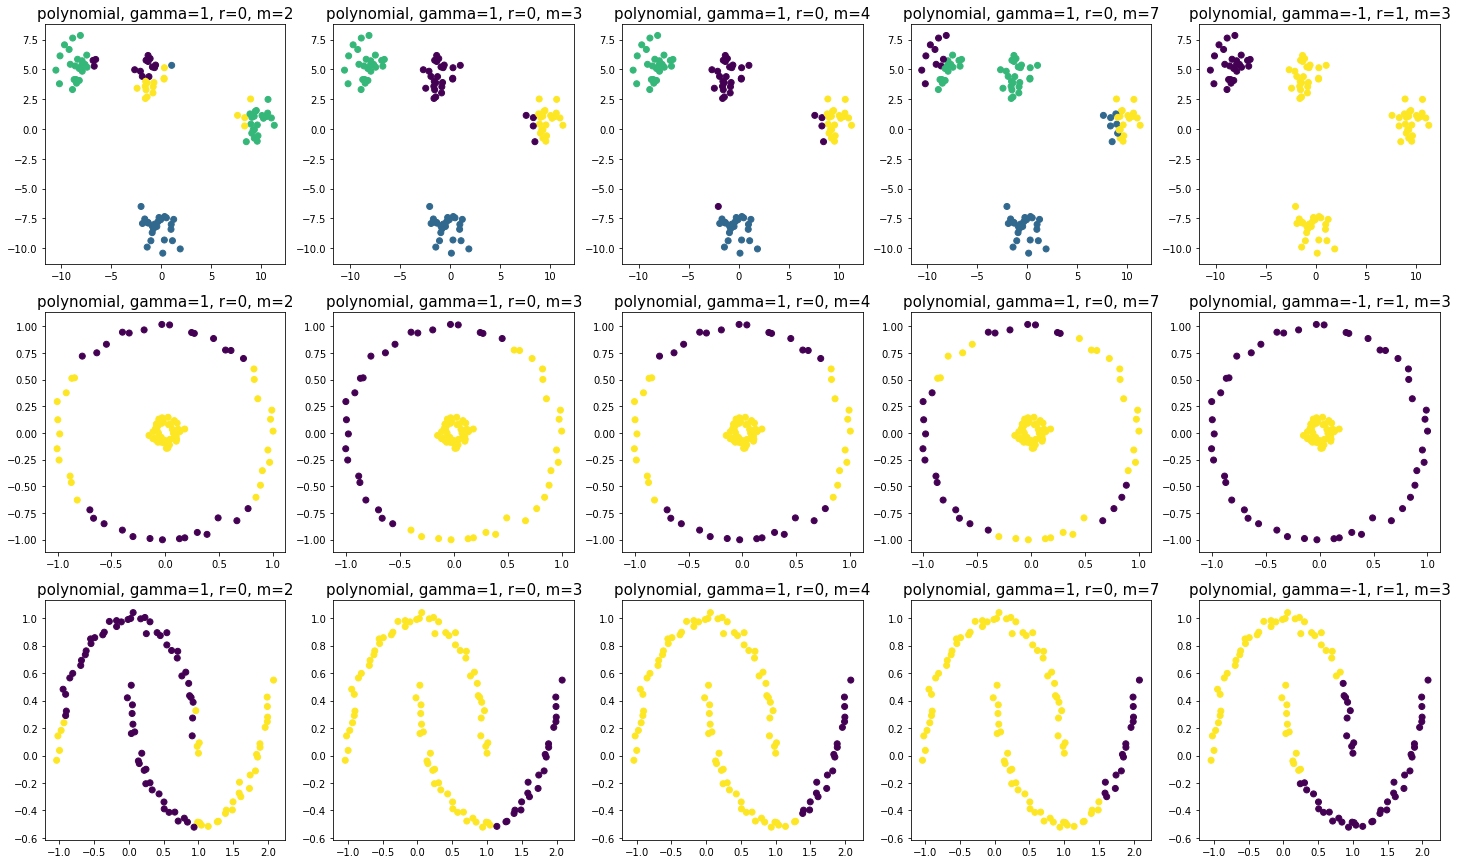

In [182]:
np.random.seed(6)
seed(1)

fig, axs1 = plt.subplots(3,5,figsize=(25,15))

num_datapoints=100
num_clusters=4

# polynomial version 1
gamma, r, m=1, 0, 2
GeneratePlot('polynomial','blobs',0,0,num_clusters=num_clusters,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)
GeneratePlot('polynomial','circles',1,0,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)
GeneratePlot('polynomial','moons',2,0,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)

# polynomial version 2
gamma, r, m=1, 0, 3
GeneratePlot('polynomial','blobs',0,1,num_clusters=num_clusters,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)
GeneratePlot('polynomial','circles',1,1,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)
GeneratePlot('polynomial','moons',2,1,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)


# polynomial version 3
gamma, r, m=1, 0, 4
GeneratePlot('polynomial','blobs',0,2,num_clusters=num_clusters,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)
GeneratePlot('polynomial','circles',1,2,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)
GeneratePlot('polynomial','moons',2,2,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)


# polynomial version 4
gamma, r, m=1, 0, 7
GeneratePlot('polynomial','blobs',0,3,num_clusters=num_clusters,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)
GeneratePlot('polynomial','circles',1,3,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)
GeneratePlot('polynomial','moons',2,3,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)

# polynomial version 5
gamma, r, m=-1, 1, 3
GeneratePlot('polynomial','blobs',0,4,num_clusters=num_clusters,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)
GeneratePlot('polynomial','circles',1,4,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)
GeneratePlot('polynomial','moons',2,4,num_datapoints=num_datapoints,m=m,r=r,gamma=gamma)

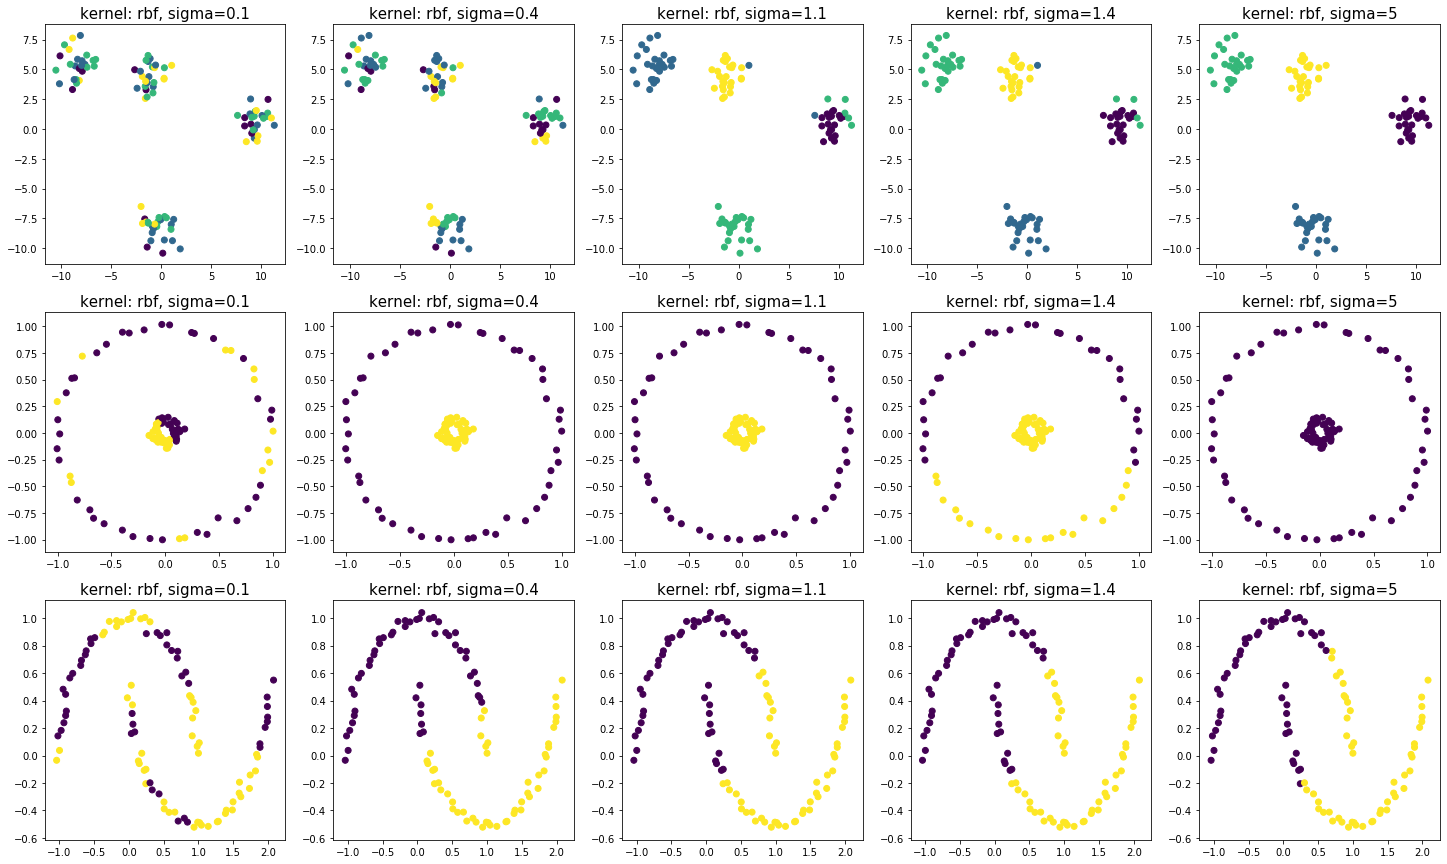

In [195]:
np.random.seed(6)
seed(1)

fig, axs1 = plt.subplots(3,5,figsize=(25,15))

num_datapoints=100
num_clusters=4

# polynomial version 1
sigma=0.1
GeneratePlot('rbf','blobs',0,0,num_clusters=num_clusters,num_datapoints=num_datapoints,sigma=sigma)
GeneratePlot('rbf','circles',1,0,num_datapoints=num_datapoints,sigma=sigma)
GeneratePlot('rbf','moons',2,0,num_datapoints=num_datapoints,sigma=sigma)

# polynomial version 2
sigma=0.4
GeneratePlot('rbf','blobs',0,1,num_clusters=num_clusters,num_datapoints=num_datapoints,sigma=sigma)
GeneratePlot('rbf','circles',1,1,num_datapoints=num_datapoints,sigma=sigma)
GeneratePlot('rbf','moons',2,1,num_datapoints=num_datapoints,sigma=sigma)


# polynomial version 3
sigma=1.1
GeneratePlot('rbf','blobs',0,2,num_clusters=num_clusters,num_datapoints=num_datapoints,sigma=sigma)
GeneratePlot('rbf','circles',1,2,num_datapoints=num_datapoints,sigma=sigma)
GeneratePlot('rbf','moons',2,2,num_datapoints=num_datapoints,sigma=sigma)


# polynomial version 4
sigma=1.4
GeneratePlot('rbf','blobs',0,3,num_clusters=num_clusters,num_datapoints=num_datapoints,sigma=sigma)
GeneratePlot('rbf','circles',1,3,num_datapoints=num_datapoints,sigma=sigma)
GeneratePlot('rbf','moons',2,3,num_datapoints=num_datapoints,sigma=sigma)

# polynomial version 5
sigma=5
GeneratePlot('rbf','blobs',0,4,num_clusters=num_clusters,num_datapoints=num_datapoints,sigma=sigma)
GeneratePlot('rbf','circles',1,4,num_datapoints=num_datapoints,sigma=sigma)
GeneratePlot('rbf','moons',2,4,num_datapoints=num_datapoints,sigma=sigma)

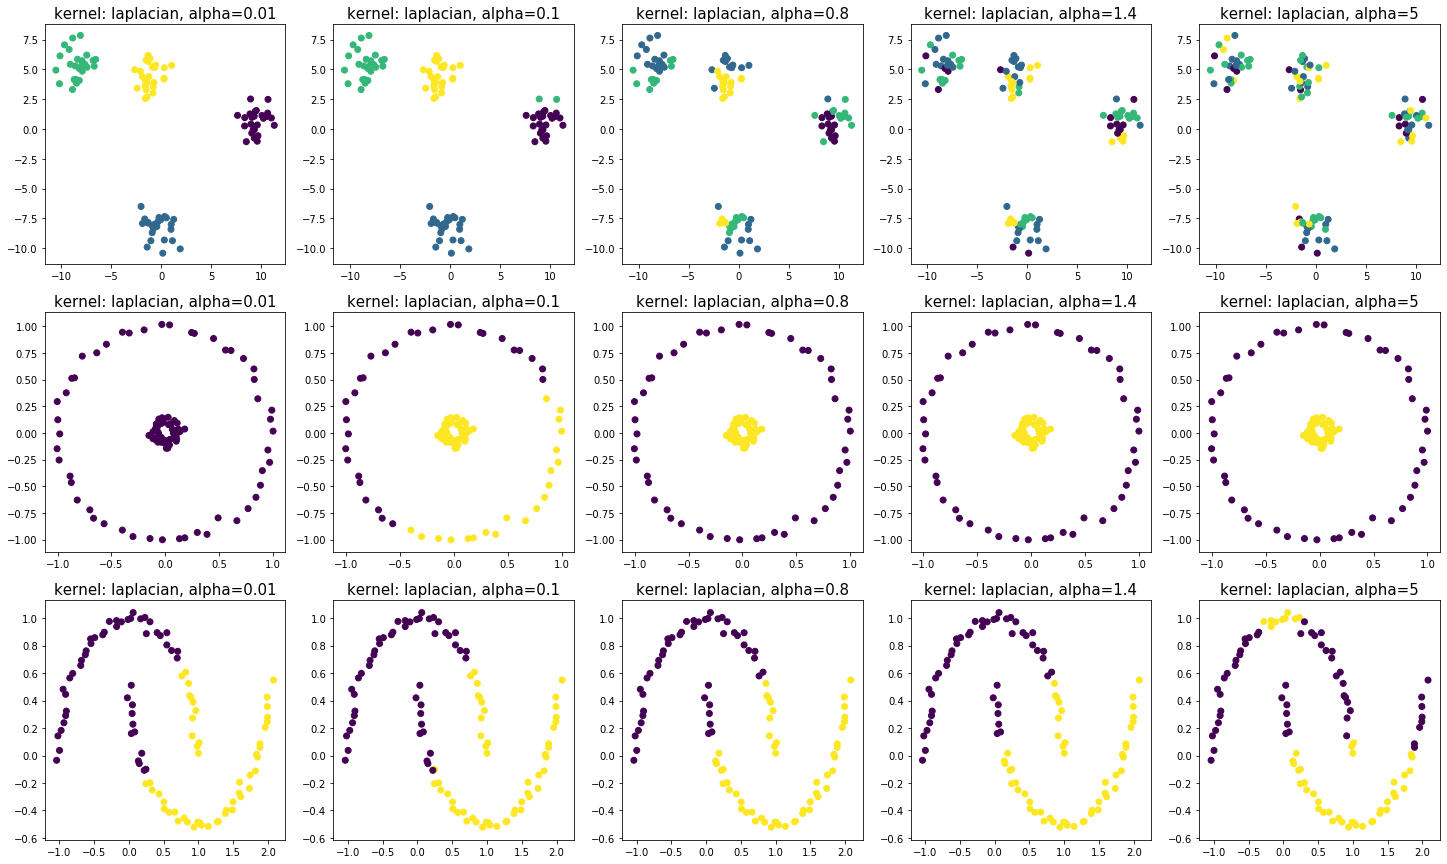

In [200]:
np.random.seed(6)
seed(1)

fig, axs1 = plt.subplots(3,5,figsize=(25,15))

num_datapoints=100
num_clusters=4

# polynomial version 1
alpha=0.01
GeneratePlot('laplacian','blobs',0,0,num_clusters=num_clusters,num_datapoints=num_datapoints,alpha=alpha)
GeneratePlot('laplacian','circles',1,0,num_datapoints=num_datapoints,alpha=alpha)
GeneratePlot('laplacian','moons',2,0,num_datapoints=num_datapoints,alpha=alpha)

# polynomial version 1
alpha=0.1
GeneratePlot('laplacian','blobs',0,1,num_clusters=num_clusters,num_datapoints=num_datapoints,alpha=alpha)
GeneratePlot('laplacian','circles',1,1,num_datapoints=num_datapoints,alpha=alpha)
GeneratePlot('laplacian','moons',2,1,num_datapoints=num_datapoints,alpha=alpha)

# polynomial version 1
alpha=0.8
GeneratePlot('laplacian','blobs',0,2,num_clusters=num_clusters,num_datapoints=num_datapoints,alpha=alpha)
GeneratePlot('laplacian','circles',1,2,num_datapoints=num_datapoints,alpha=alpha)
GeneratePlot('laplacian','moons',2,2,num_datapoints=num_datapoints,alpha=alpha)

# polynomial version 1
alpha=1.4
GeneratePlot('laplacian','blobs',0,3,num_clusters=num_clusters,num_datapoints=num_datapoints,alpha=alpha)
GeneratePlot('laplacian','circles',1,3,num_datapoints=num_datapoints,alpha=alpha)
GeneratePlot('laplacian','moons',2,3,num_datapoints=num_datapoints,alpha=alpha)

# polynomial version 1
alpha=5
GeneratePlot('laplacian','blobs',0,4,num_clusters=num_clusters,num_datapoints=num_datapoints,alpha=alpha)
GeneratePlot('laplacian','circles',1,4,num_datapoints=num_datapoints,alpha=alpha)
GeneratePlot('laplacian','moons',2,4,num_datapoints=num_datapoints,alpha=alpha)

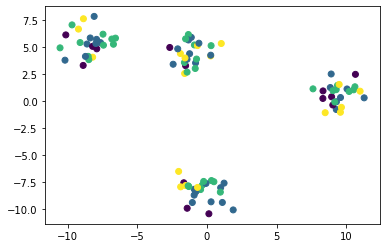

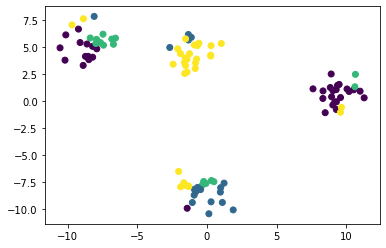

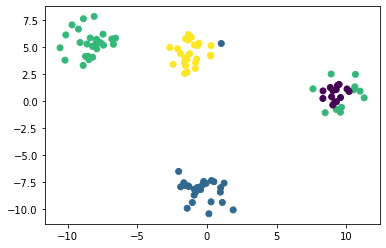

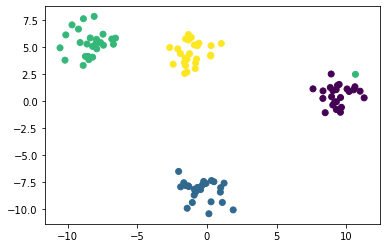

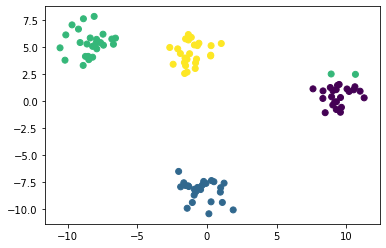

In [186]:
sigma = 0.5
kernel='laplacian'
data_set='blobs'
num_clusters=4
DrawPlotsWhileFindingZ(kernel,data_set,num_datapoints,num_clusters, alpha=0.1);

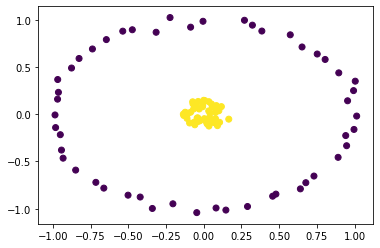

In [157]:
np.random.seed(0)
seed(0)
num_datapoints=100
num_clusters=2
circles=make_circles(num_datapoints,noise=0.03, factor=0.1)
X=circles[0]
num_datapoints=np.size(X,0)

# kernel='linear'
# gram=GetGramMatrix(X,kernel)

# kernel='polynomial'
# gram=GetGramMatrix(X,kernel,gamma=2,r=1,m=2)

# kernel='rbf'
# gram=GetGramMatrix(X,kernel,sigma=0.5)

kernel='laplacian'
gram=GetGramMatrix(X,kernel,alpha=2)

# kernel='sigmoid'
# gram=GetGramMatrix(X,kernel,beta=3,c=0.1)

Z_new=GenerateZ(num_datapoints,num_clusters)

Z=LoopZ(Z_new,gram,num_datapoints,num_clusters)
classes=np.matmul(Z,np.linspace(1,num_clusters,num_clusters))

plt.scatter(X[:,0],X[:,1],c=classes);



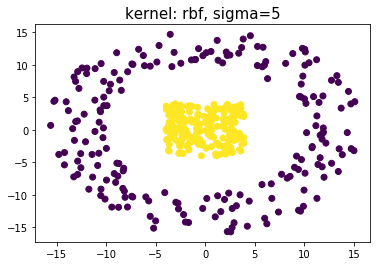

In [17]:
X=np.genfromtxt("test2_data_winnie.txt")
num_clusters=2
num_datapoints=400
sigma=5
kwargs={'sigma':sigma}
kernel='rbf'
gram=GetGramMatrix(X,kernel,**kwargs)
Z_new=GenerateZ(num_datapoints,num_clusters)
Z=LoopZ(Z_new,gram,num_datapoints,num_clusters)
classes=np.matmul(Z,np.linspace(1,num_clusters,num_clusters))
plt.scatter(X[:,0],X[:,1],c=classes);

plt.title('kernel: ' + kernel +', sigma='+str(sigma), fontsize=15);
